## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9969957	total: 70.2ms	remaining: 1m 10s
1:	learn: 0.9783423	total: 71.4ms	remaining: 35.6s
2:	learn: 0.9596054	total: 72.6ms	remaining: 24.1s
3:	learn: 0.9427155	total: 73.7ms	remaining: 18.4s
4:	learn: 0.9265693	total: 74.8ms	remaining: 14.9s
5:	learn: 0.9124447	total: 75.5ms	remaining: 12.5s
6:	learn: 0.8937288	total: 76.5ms	remaining: 10.8s
7:	learn: 0.8765312	total: 77.4ms	remaining: 9.6s
8:	learn: 0.8614144	total: 78.4ms	remaining: 8.63s
9:	learn: 0.8467969	total: 79.3ms	remaining: 7.85s
10:	learn: 0.8320331	total: 80.2ms	remaining: 7.21s
11:	learn: 0.8208474	total: 81ms	remaining: 6.67s
12:	learn: 0.8080320	total: 81.8ms	remaining: 6.21s
13:	learn: 0.7924207	total: 82.7ms	remaining: 5.83s
14:	learn: 0.7792651	total: 83.6ms	remaining: 5.49s
15:	learn: 0.7650887	total: 84.4ms	remaining: 5.19s
16:	learn: 0.7526474	total: 85.1ms	remaining: 4.92s
17:	learn: 0.7405171	total: 85.9ms	remaining: 4.69s
18:	learn: 0.7290390	total: 86.8ms	remaining: 

46:	learn: 0.4927504	total: 110ms	remaining: 2.23s
47:	learn: 0.4882868	total: 111ms	remaining: 2.2s
48:	learn: 0.4829885	total: 112ms	remaining: 2.17s
49:	learn: 0.4758934	total: 113ms	remaining: 2.14s
50:	learn: 0.4714403	total: 113ms	remaining: 2.11s
51:	learn: 0.4660686	total: 114ms	remaining: 2.08s
52:	learn: 0.4613526	total: 115ms	remaining: 2.05s
53:	learn: 0.4576362	total: 116ms	remaining: 2.03s
54:	learn: 0.4521628	total: 117ms	remaining: 2s
55:	learn: 0.4483717	total: 117ms	remaining: 1.98s
56:	learn: 0.4443234	total: 118ms	remaining: 1.96s
57:	learn: 0.4400207	total: 119ms	remaining: 1.94s
58:	learn: 0.4362374	total: 120ms	remaining: 1.92s
59:	learn: 0.4319620	total: 121ms	remaining: 1.9s
60:	learn: 0.4284221	total: 122ms	remaining: 1.88s
61:	learn: 0.4234518	total: 123ms	remaining: 1.86s
62:	learn: 0.4201988	total: 124ms	remaining: 1.84s
63:	learn: 0.4154950	total: 124ms	remaining: 1.82s
64:	learn: 0.4115536	total: 125ms	remaining: 1.8s
65:	learn: 0.4071612	total: 126ms	rem

140:	learn: 0.2653565	total: 192ms	remaining: 1.17s
141:	learn: 0.2643039	total: 193ms	remaining: 1.17s
142:	learn: 0.2634364	total: 194ms	remaining: 1.16s
143:	learn: 0.2624737	total: 195ms	remaining: 1.16s
144:	learn: 0.2614867	total: 196ms	remaining: 1.16s
145:	learn: 0.2607089	total: 197ms	remaining: 1.15s
146:	learn: 0.2599251	total: 198ms	remaining: 1.15s
147:	learn: 0.2586827	total: 199ms	remaining: 1.14s
148:	learn: 0.2577320	total: 200ms	remaining: 1.14s
149:	learn: 0.2567690	total: 201ms	remaining: 1.14s
150:	learn: 0.2559014	total: 201ms	remaining: 1.13s
151:	learn: 0.2550655	total: 202ms	remaining: 1.13s
152:	learn: 0.2543105	total: 203ms	remaining: 1.12s
153:	learn: 0.2533127	total: 204ms	remaining: 1.12s
154:	learn: 0.2523299	total: 205ms	remaining: 1.11s
155:	learn: 0.2513768	total: 206ms	remaining: 1.11s
156:	learn: 0.2507322	total: 206ms	remaining: 1.11s
157:	learn: 0.2498263	total: 207ms	remaining: 1.1s
158:	learn: 0.2489029	total: 208ms	remaining: 1.1s
159:	learn: 0.

268:	learn: 0.1880048	total: 300ms	remaining: 816ms
269:	learn: 0.1873743	total: 301ms	remaining: 814ms
270:	learn: 0.1870686	total: 302ms	remaining: 812ms
271:	learn: 0.1869263	total: 303ms	remaining: 810ms
272:	learn: 0.1863137	total: 303ms	remaining: 808ms
273:	learn: 0.1859338	total: 304ms	remaining: 806ms
274:	learn: 0.1855374	total: 305ms	remaining: 804ms
275:	learn: 0.1850650	total: 306ms	remaining: 802ms
276:	learn: 0.1847059	total: 307ms	remaining: 801ms
277:	learn: 0.1845450	total: 307ms	remaining: 799ms
278:	learn: 0.1839504	total: 308ms	remaining: 797ms
279:	learn: 0.1836295	total: 309ms	remaining: 795ms
280:	learn: 0.1834620	total: 310ms	remaining: 793ms
281:	learn: 0.1831116	total: 311ms	remaining: 791ms
282:	learn: 0.1830298	total: 312ms	remaining: 790ms
283:	learn: 0.1829107	total: 313ms	remaining: 788ms
284:	learn: 0.1824928	total: 313ms	remaining: 786ms
285:	learn: 0.1818544	total: 314ms	remaining: 784ms
286:	learn: 0.1817526	total: 315ms	remaining: 782ms
287:	learn: 

371:	learn: 0.1574083	total: 383ms	remaining: 647ms
372:	learn: 0.1570544	total: 384ms	remaining: 646ms
373:	learn: 0.1565868	total: 385ms	remaining: 644ms
374:	learn: 0.1562937	total: 386ms	remaining: 643ms
375:	learn: 0.1562036	total: 386ms	remaining: 641ms
376:	learn: 0.1559464	total: 387ms	remaining: 640ms
377:	learn: 0.1556268	total: 388ms	remaining: 639ms
378:	learn: 0.1554231	total: 389ms	remaining: 638ms
379:	learn: 0.1550452	total: 390ms	remaining: 636ms
380:	learn: 0.1547509	total: 391ms	remaining: 635ms
381:	learn: 0.1545912	total: 391ms	remaining: 633ms
382:	learn: 0.1542191	total: 392ms	remaining: 632ms
383:	learn: 0.1538386	total: 393ms	remaining: 630ms
384:	learn: 0.1535492	total: 394ms	remaining: 629ms
385:	learn: 0.1532090	total: 394ms	remaining: 628ms
386:	learn: 0.1527609	total: 395ms	remaining: 626ms
387:	learn: 0.1525009	total: 396ms	remaining: 625ms
388:	learn: 0.1521793	total: 397ms	remaining: 623ms
389:	learn: 0.1518729	total: 398ms	remaining: 622ms
390:	learn: 

498:	learn: 0.1267347	total: 491ms	remaining: 493ms
499:	learn: 0.1266197	total: 492ms	remaining: 492ms
500:	learn: 0.1262836	total: 493ms	remaining: 491ms
501:	learn: 0.1259939	total: 493ms	remaining: 489ms
502:	learn: 0.1257334	total: 494ms	remaining: 488ms
503:	learn: 0.1255517	total: 495ms	remaining: 487ms
504:	learn: 0.1252333	total: 496ms	remaining: 486ms
505:	learn: 0.1252107	total: 497ms	remaining: 485ms
506:	learn: 0.1250306	total: 497ms	remaining: 484ms
507:	learn: 0.1247309	total: 498ms	remaining: 482ms
508:	learn: 0.1245595	total: 499ms	remaining: 481ms
509:	learn: 0.1242969	total: 500ms	remaining: 480ms
510:	learn: 0.1240520	total: 501ms	remaining: 479ms
511:	learn: 0.1238922	total: 501ms	remaining: 478ms
512:	learn: 0.1236459	total: 502ms	remaining: 477ms
513:	learn: 0.1234414	total: 503ms	remaining: 476ms
514:	learn: 0.1234158	total: 504ms	remaining: 475ms
515:	learn: 0.1232535	total: 505ms	remaining: 473ms
516:	learn: 0.1230071	total: 506ms	remaining: 472ms
517:	learn: 

597:	learn: 0.1066829	total: 573ms	remaining: 385ms
598:	learn: 0.1063963	total: 574ms	remaining: 384ms
599:	learn: 0.1063793	total: 575ms	remaining: 383ms
600:	learn: 0.1061471	total: 576ms	remaining: 382ms
601:	learn: 0.1059018	total: 577ms	remaining: 381ms
602:	learn: 0.1057498	total: 578ms	remaining: 380ms
603:	learn: 0.1055243	total: 578ms	remaining: 379ms
604:	learn: 0.1053213	total: 579ms	remaining: 378ms
605:	learn: 0.1052484	total: 580ms	remaining: 377ms
606:	learn: 0.1050853	total: 581ms	remaining: 376ms
607:	learn: 0.1048770	total: 582ms	remaining: 375ms
608:	learn: 0.1046772	total: 582ms	remaining: 374ms
609:	learn: 0.1044658	total: 583ms	remaining: 373ms
610:	learn: 0.1043103	total: 584ms	remaining: 372ms
611:	learn: 0.1040827	total: 585ms	remaining: 371ms
612:	learn: 0.1038733	total: 586ms	remaining: 370ms
613:	learn: 0.1036294	total: 587ms	remaining: 369ms
614:	learn: 0.1033560	total: 587ms	remaining: 368ms
615:	learn: 0.1031285	total: 588ms	remaining: 367ms
616:	learn: 

728:	learn: 0.0868323	total: 682ms	remaining: 253ms
729:	learn: 0.0867377	total: 683ms	remaining: 253ms
730:	learn: 0.0866228	total: 684ms	remaining: 252ms
731:	learn: 0.0864775	total: 684ms	remaining: 251ms
732:	learn: 0.0862724	total: 685ms	remaining: 250ms
733:	learn: 0.0861312	total: 686ms	remaining: 249ms
734:	learn: 0.0860101	total: 687ms	remaining: 248ms
735:	learn: 0.0859128	total: 688ms	remaining: 247ms
736:	learn: 0.0857356	total: 689ms	remaining: 246ms
737:	learn: 0.0855226	total: 689ms	remaining: 245ms
738:	learn: 0.0854529	total: 690ms	remaining: 244ms
739:	learn: 0.0852806	total: 691ms	remaining: 243ms
740:	learn: 0.0852327	total: 692ms	remaining: 242ms
741:	learn: 0.0850122	total: 693ms	remaining: 241ms
742:	learn: 0.0848411	total: 693ms	remaining: 240ms
743:	learn: 0.0847348	total: 694ms	remaining: 239ms
744:	learn: 0.0846015	total: 695ms	remaining: 238ms
745:	learn: 0.0844400	total: 696ms	remaining: 237ms
746:	learn: 0.0843601	total: 697ms	remaining: 236ms
747:	learn: 

828:	learn: 0.0748308	total: 765ms	remaining: 158ms
829:	learn: 0.0746924	total: 766ms	remaining: 157ms
830:	learn: 0.0745663	total: 767ms	remaining: 156ms
831:	learn: 0.0743910	total: 768ms	remaining: 155ms
832:	learn: 0.0743435	total: 768ms	remaining: 154ms
833:	learn: 0.0742644	total: 769ms	remaining: 153ms
834:	learn: 0.0742013	total: 770ms	remaining: 152ms
835:	learn: 0.0740336	total: 771ms	remaining: 151ms
836:	learn: 0.0739636	total: 772ms	remaining: 150ms
837:	learn: 0.0738559	total: 772ms	remaining: 149ms
838:	learn: 0.0737813	total: 773ms	remaining: 148ms
839:	learn: 0.0736629	total: 774ms	remaining: 147ms
840:	learn: 0.0736040	total: 775ms	remaining: 146ms
841:	learn: 0.0734631	total: 775ms	remaining: 146ms
842:	learn: 0.0732671	total: 776ms	remaining: 145ms
843:	learn: 0.0731748	total: 777ms	remaining: 144ms
844:	learn: 0.0730566	total: 778ms	remaining: 143ms
845:	learn: 0.0729541	total: 779ms	remaining: 142ms
846:	learn: 0.0728868	total: 779ms	remaining: 141ms
847:	learn: 

958:	learn: 0.0629157	total: 873ms	remaining: 37.3ms
959:	learn: 0.0627953	total: 874ms	remaining: 36.4ms
960:	learn: 0.0626861	total: 874ms	remaining: 35.5ms
961:	learn: 0.0625205	total: 875ms	remaining: 34.6ms
962:	learn: 0.0624462	total: 876ms	remaining: 33.7ms
963:	learn: 0.0624146	total: 877ms	remaining: 32.7ms
964:	learn: 0.0623527	total: 878ms	remaining: 31.8ms
965:	learn: 0.0622228	total: 879ms	remaining: 30.9ms
966:	learn: 0.0621320	total: 879ms	remaining: 30ms
967:	learn: 0.0620398	total: 880ms	remaining: 29.1ms
968:	learn: 0.0619668	total: 881ms	remaining: 28.2ms
969:	learn: 0.0619182	total: 882ms	remaining: 27.3ms
970:	learn: 0.0618434	total: 883ms	remaining: 26.4ms
971:	learn: 0.0616888	total: 884ms	remaining: 25.5ms
972:	learn: 0.0616311	total: 885ms	remaining: 24.6ms
973:	learn: 0.0615472	total: 886ms	remaining: 23.6ms
974:	learn: 0.0615072	total: 886ms	remaining: 22.7ms
975:	learn: 0.0614421	total: 887ms	remaining: 21.8ms
976:	learn: 0.0613348	total: 888ms	remaining: 20

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

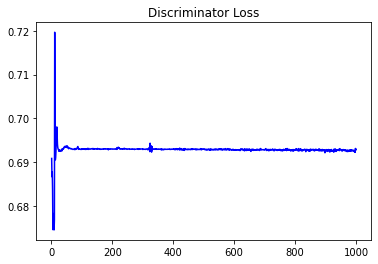

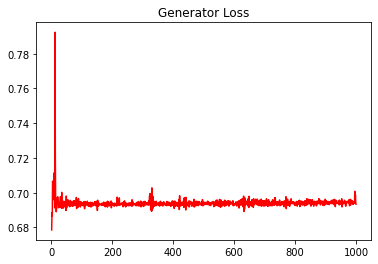

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08747586030868372


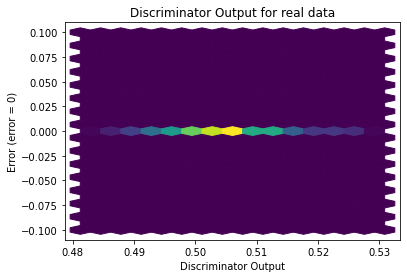

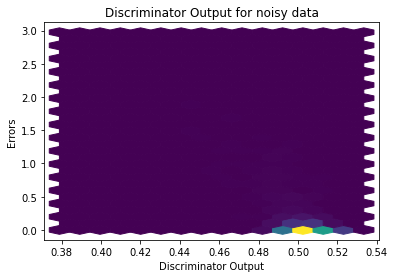

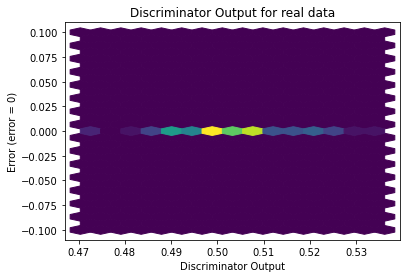

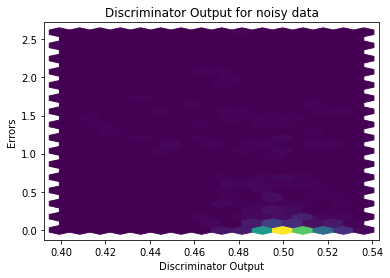

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


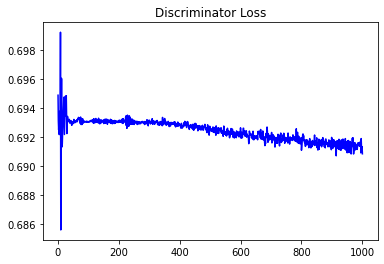

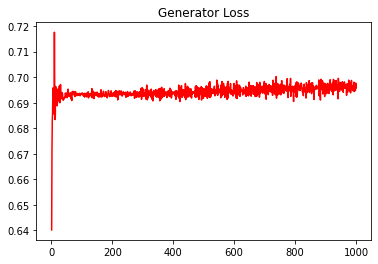

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08487196139118236


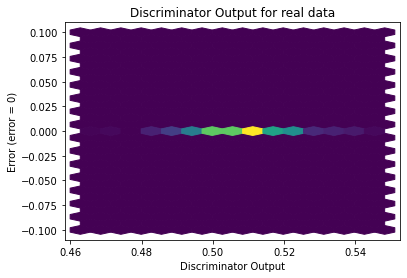

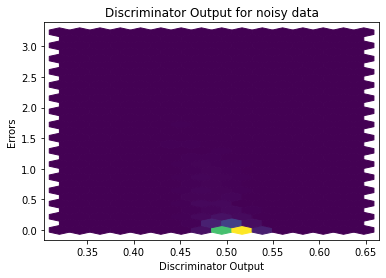

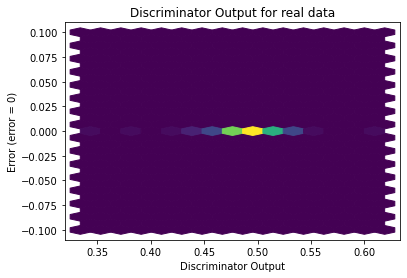

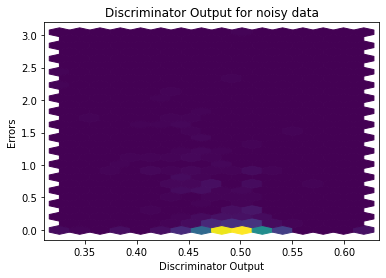

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3177]], requires_grad=True)
